/var/folders/mr/jb109g2j23g3_lypt1qxvpl40000gn/T/ipykernel_5570/157812245.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/opt/homebrew/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


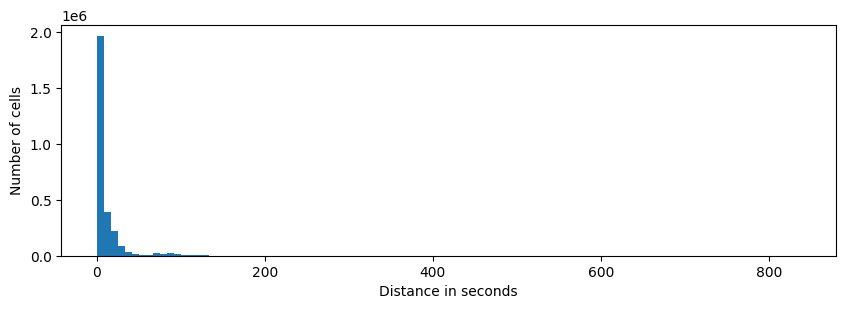

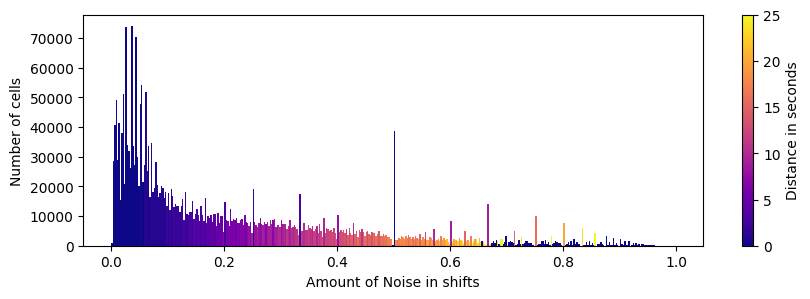

In [8]:
import json
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

with open('processed_things_2023_12_12.json') as f:
    processed_things = json.load(f)

max_distance = 0
distances = []

noises = []

for thing_name, thing in processed_things.items():
    for day_idx in range(7):
        for hour_idx in range(24):
            if thing["ShiftsFuzzyness"][day_idx][hour_idx] != -1 and thing["Metrics"][day_idx][hour_idx] != -1:
                noises.append(thing["ShiftsFuzzyness"][day_idx][hour_idx])
                distance = thing["Metrics"][day_idx][hour_idx]
                distances.append(distance)
                if distance > max_distance:
                    max_distance = distance
                    

fig, ax = plt.subplots(figsize=(10, 3))
ax.hist(distances, bins=100)
ax.set_ylabel('Number of cells')
ax.set_xlabel('Distance in seconds')
ax.set_xlim(0, 25)
fig.show()


                    
fig, ax = plt.subplots(figsize=(10, 3))
bin_size = 0.0025
bin_min = 0
bin_max = 1
median_distance_per_bin = []
distances_per_bin = []
colors = []
color_map = plt.get_cmap('plasma')

for bin_idx in range(int((bin_max - bin_min) / bin_size)):
    distances_per_bin.append([])
for i in range(len(noises)):
    bin_idx = int((noises[i] - bin_min) / bin_size)
    if bin_idx >= 0 and bin_idx < len(distances_per_bin):
        distances_per_bin[bin_idx].append(distances[i])
for _distances in distances_per_bin:
    median_distance_per_bin.append(np.median(_distances))
_, _, patches = ax.hist(noises, bins=np.arange(bin_min, bin_max, bin_size))
for i in range(len(patches)):
    percentage = median_distance_per_bin[i] / 25
    if percentage > 1:
        percentage = 1
    patches[i].set_facecolor(color_map(percentage))
ax.set_ylabel('Number of cells')
ax.set_xlabel('Amount of Noise in shifts')

# Show color bar
norm = Normalize(vmin=0, vmax=25)
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Distance in seconds')

fig.savefig('shifts_histogram.pdf', bbox_inches='tight')


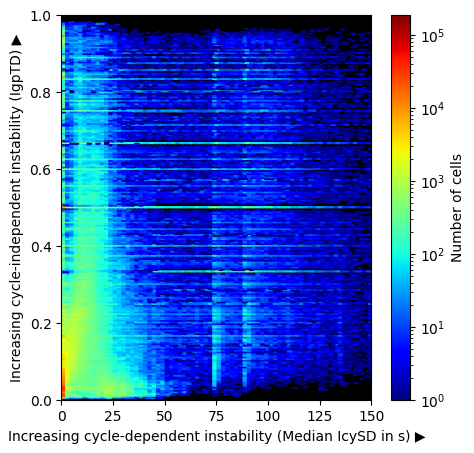

In [15]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open('processed_things_2023_12_14.json') as f:
    processed_things = json.load(f)
    
noise = []
distances = []

def scatter_hist(x, y, ax, fig):
    # the scatter plot:
    hex_ax = ax.hexbin(x, y, gridsize=400, bins="log", cmap='jet')
    
    ax.set_facecolor('black')
    ax.set_xlabel("Increasing cycle-dependent instability (Median IcySD in s) ▶")
    ax.set_ylabel("Increasing cycle-independent instability (IgpTD) ▶")
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 150)
    # ax.axvspan(70, 80, color='red', alpha=0.2)
    # ax.axvspan(85, 95, color='red', alpha=0.2)
    
    cb = fig.colorbar(hex_ax, location='right')
    cb.set_label('Number of cells')

skipped_count = 0
total_count = 0
for thing_name, thing in processed_things.items():
    for day_idx in range(7):
        for hour_idx in range(24):
            if thing["Metrics"][day_idx][hour_idx] != -1.0 and thing["ShiftsFuzzyness"][day_idx][hour_idx] != -1.0:
                """ total_count += 1
                if thing["Metrics"][day_idx][hour_idx] == 0:
                    skipped_count += 1
                    continue """
                noise.append(thing["ShiftsFuzzyness"][day_idx][hour_idx])
                distances.append(thing["Metrics"][day_idx][hour_idx])
                
# print("Skipped ratio: ", skipped_count / total_count)
                
fig, ax = plt.subplots(figsize=(5, 5))

# Draw the scatter plot and marginals.
scatter_hist(distances, noise, ax, fig)

fig.savefig("images/IgpTD_IcySD.pdf", bbox_inches='tight')

